<a href="https://colab.research.google.com/github/tassiogomes/MINDD-ISEP/blob/main/MINDD_PL03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification: K-nearest-Neighbors, Naïve Bayes


#### The data to be analysed includes information from a telecommunications operator. A problem in this business is customers who leave the operator for a competitor (customer churn), since the cost of attracting a new customer is much higher than the cost of retaining customers. The data set to be analysed includes some demographic data of customers as well as information about the contract established.

### Knowing the data

In [74]:
# 1. Start by loading the data (”Churn_DataSet.csv”).
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import folium

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('drive/My Drive/MINDD/Churn_DataSet.csv', sep=',')
print(df.shape)
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(7032, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [75]:
# 2. Remove duplicate lines from the data set, if any.

# Remove duplicate rows based on all columns
df = df.drop_duplicates()

# After removing duplicates, reset the index of the DataFrame
df = df.reset_index(drop=True)

df.shape

(7010, 20)

In [76]:
print(df.columns.to_list(), "/n")
df.dtypes

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'] /n


gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [77]:
# Step 1: Check for Missing Values
missing_values = df.isna().sum()

# Alternatively, you can use isnull() to achieve the same result:
#missing_values = df.isnull().sum()

# Print the count of missing values in each column
print("Missing Values:")
print(missing_values)

# Step 2: Handle Missing Values (Choose one of the following methods)
# Option 1: Remove rows with missing values
df.dropna(inplace=True)

# Option 2: Fill missing values with a specific value (e.g., 0)
# df.fillna(0, inplace=True)

# Option 3: Fill missing values with the mean of the column
# df.fillna(df.mean(), inplace=True)

# Option 4: Interpolate missing values (for time series data)
# df.interpolate(method='linear', inplace=True)

# After handling missing values, you may want to reset the index of the DataFrame
df = df.reset_index(drop=True)

Missing Values:
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


#### Graphs

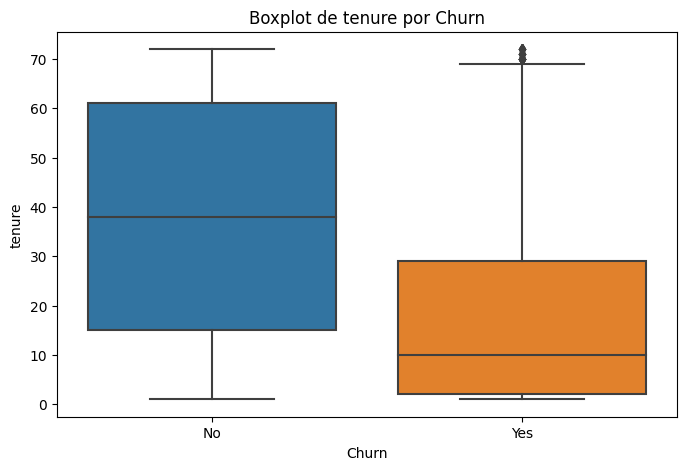

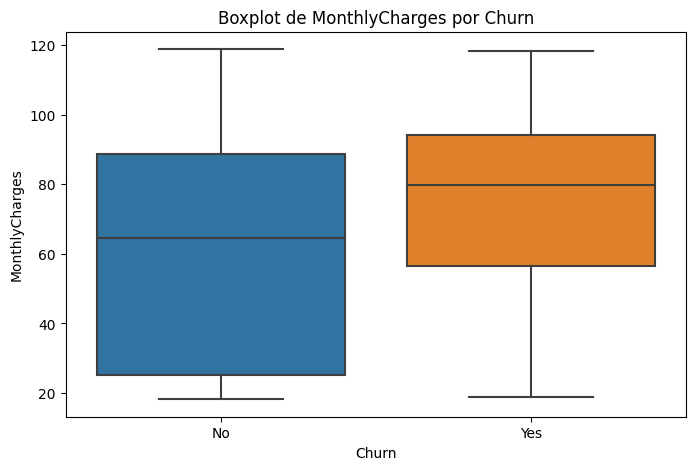

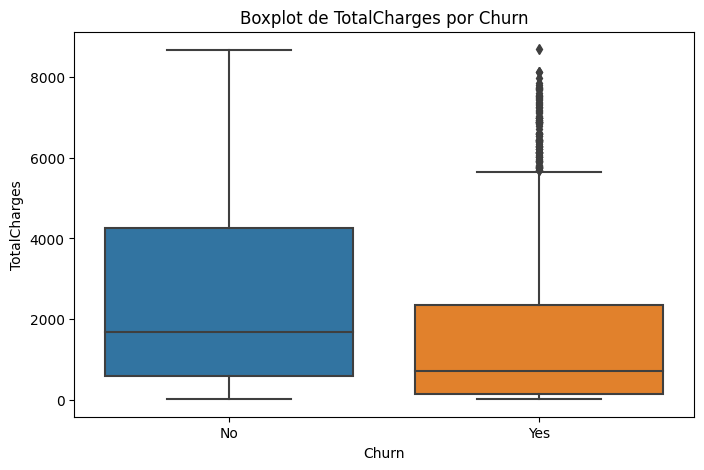

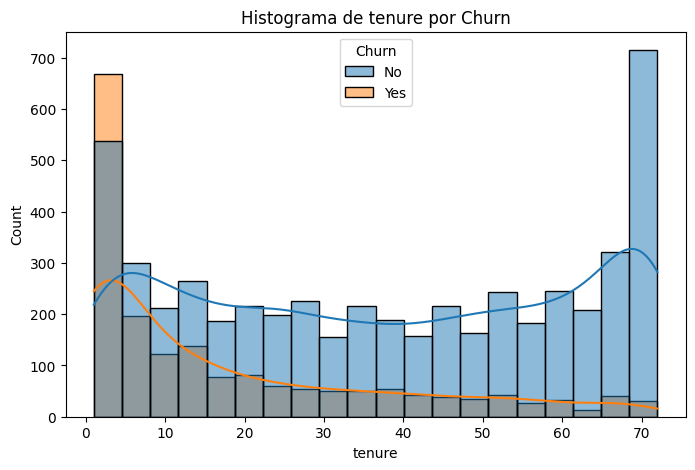

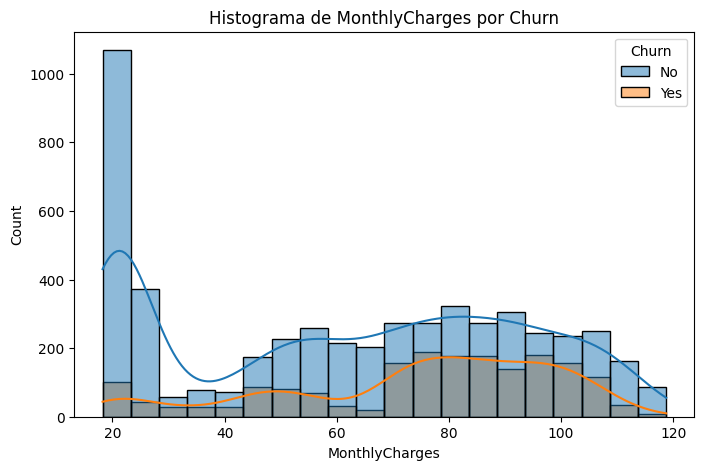

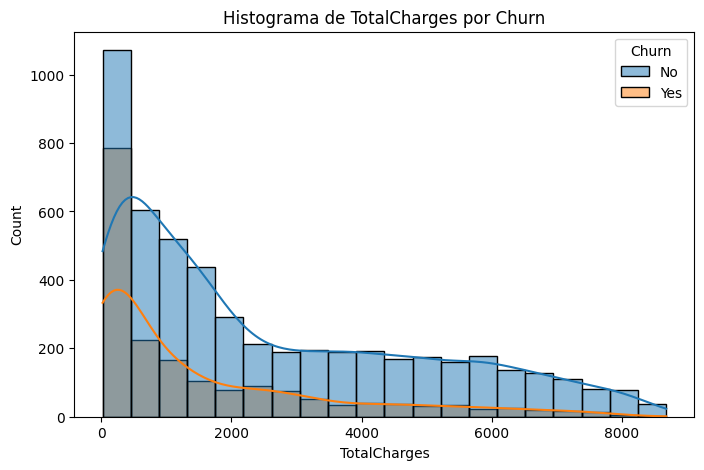

<Figure size 800x500 with 0 Axes>

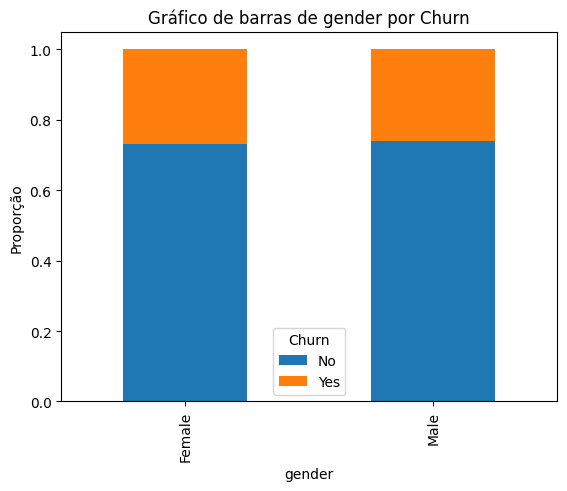

<Figure size 800x500 with 0 Axes>

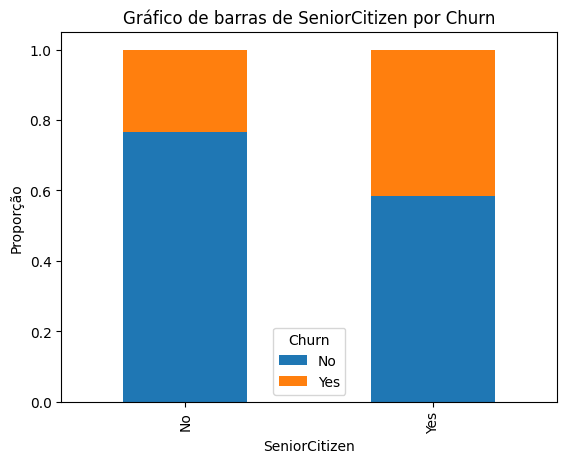

<Figure size 800x500 with 0 Axes>

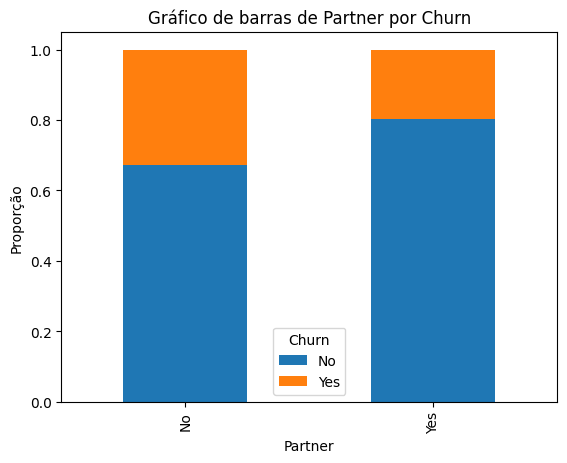

<Figure size 800x500 with 0 Axes>

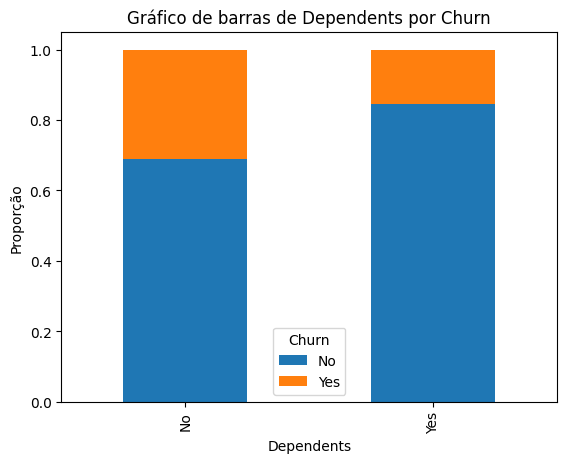

<Figure size 800x500 with 0 Axes>

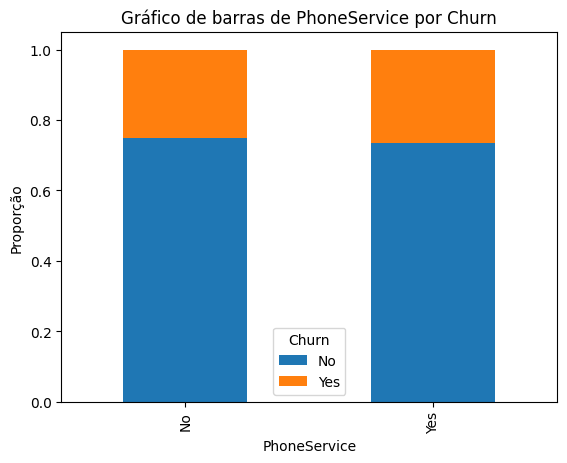

<Figure size 800x500 with 0 Axes>

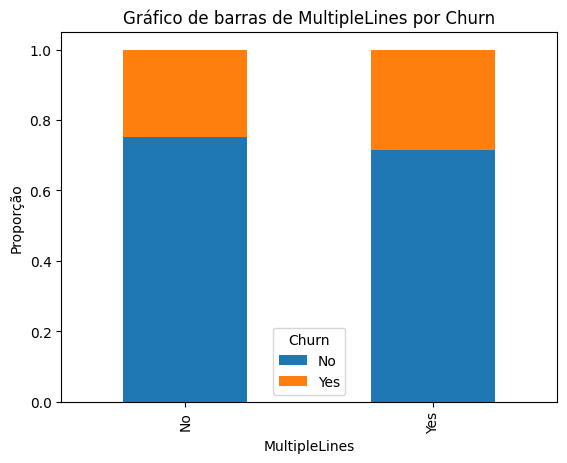

<Figure size 800x500 with 0 Axes>

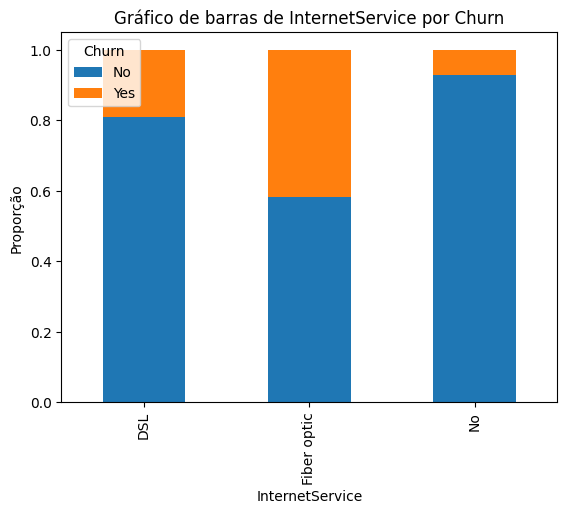

<Figure size 800x500 with 0 Axes>

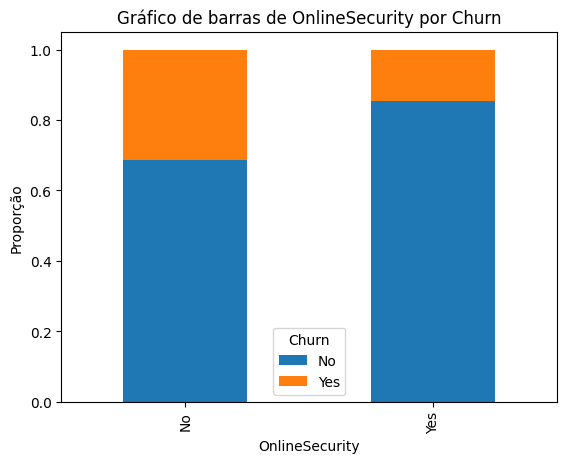

<Figure size 800x500 with 0 Axes>

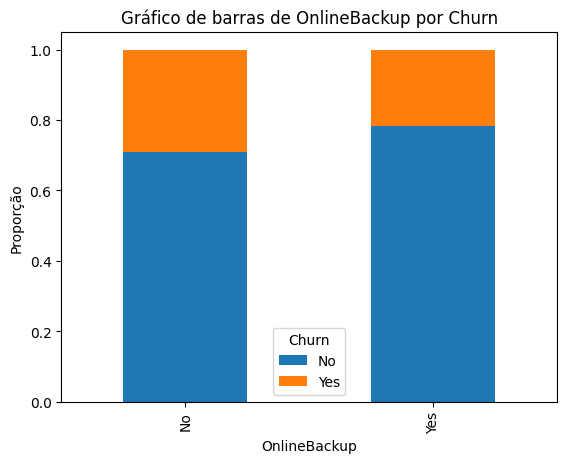

<Figure size 800x500 with 0 Axes>

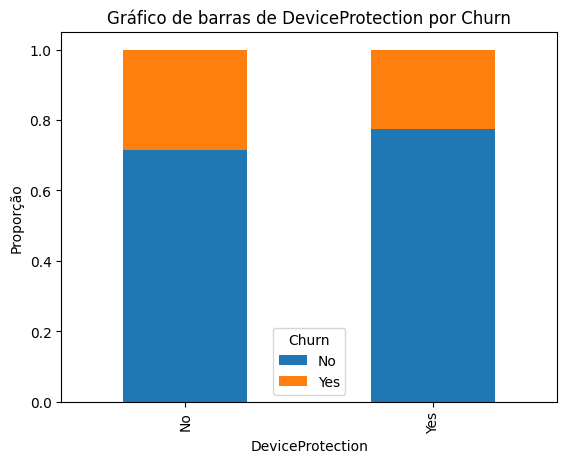

<Figure size 800x500 with 0 Axes>

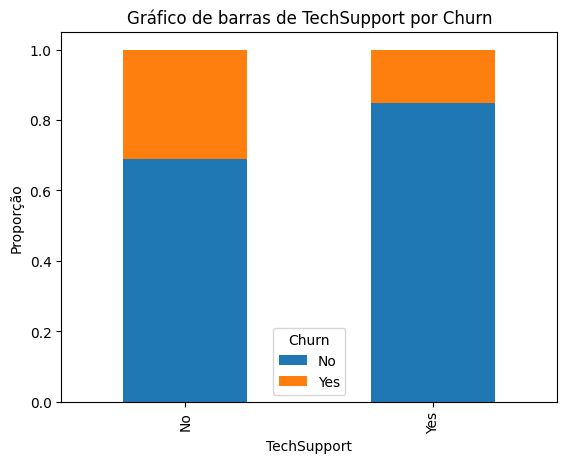

<Figure size 800x500 with 0 Axes>

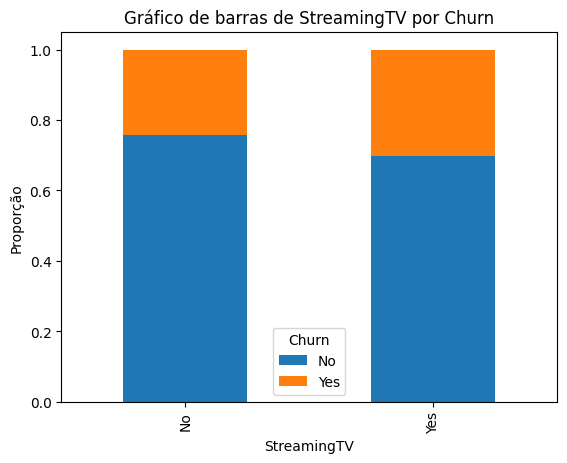

<Figure size 800x500 with 0 Axes>

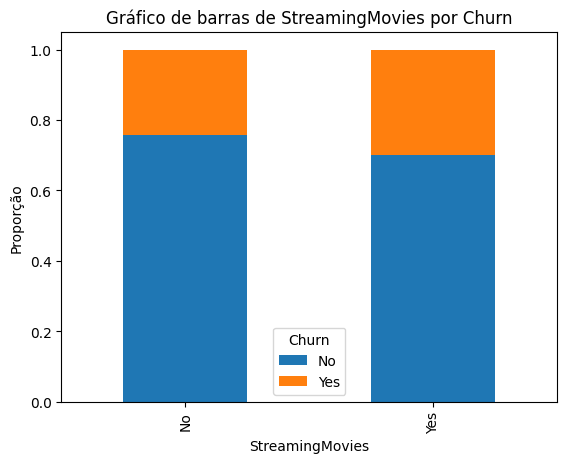

<Figure size 800x500 with 0 Axes>

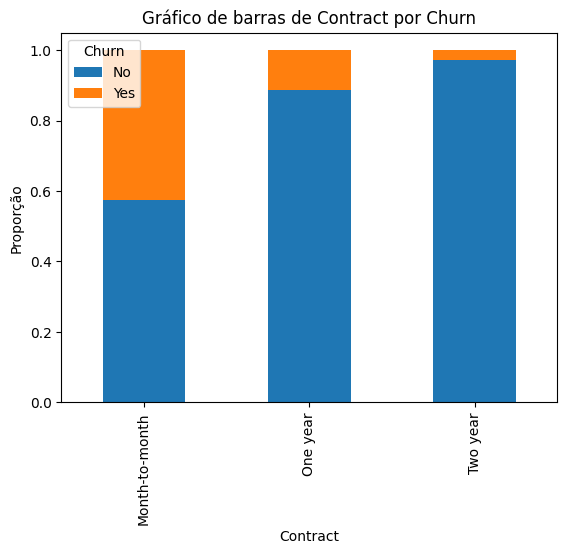

<Figure size 800x500 with 0 Axes>

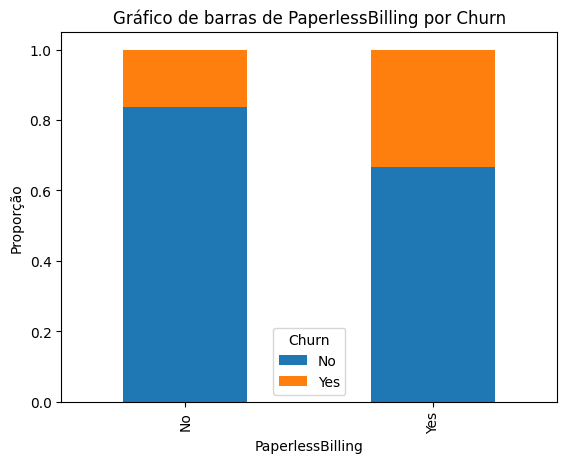

<Figure size 800x500 with 0 Axes>

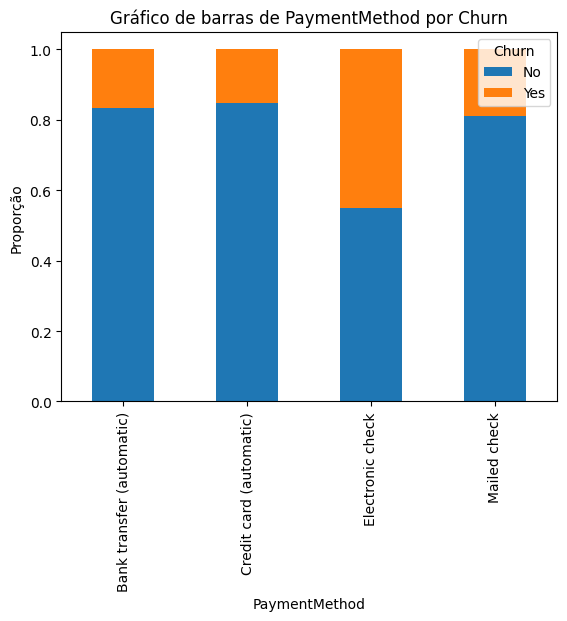

<Figure size 800x500 with 0 Axes>

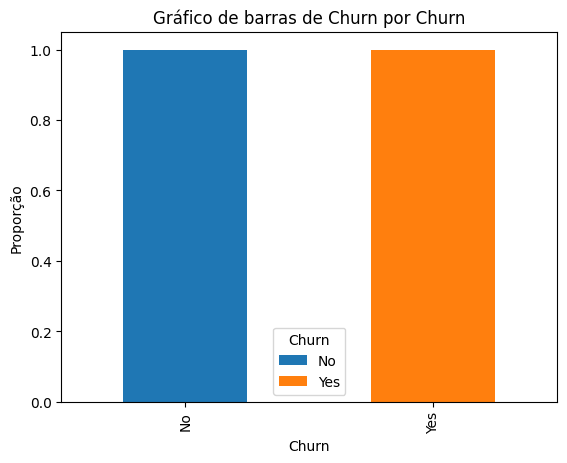

In [78]:
# Dividir o DataFrame em variáveis categóricas e numéricas
categorical_attributes = df.select_dtypes(include=['object'])
numerical_attributes = df.select_dtypes(include=['int64', 'float64'])

# Boxplots para variáveis numéricas por Churn
for column in numerical_attributes.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Churn', y=column, data=df)
    plt.title(f'Boxplot de {column} por Churn')
    plt.show()

# Histogramas para variáveis numéricas por Churn
for column in numerical_attributes.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=column, hue='Churn', bins=20, kde=True)
    plt.title(f'Histograma de {column} por Churn')
    plt.show()

# Gráficos de barras empilhadas para variáveis categóricas por Churn
for column in categorical_attributes.columns:
    plt.figure(figsize=(8, 5))
    ct = pd.crosstab(df[column], df['Churn'], normalize='index')
    ct.plot(kind='bar', stacked=True)
    plt.title(f'Gráfico de barras de {column} por Churn')
    plt.xlabel(column)
    plt.ylabel('Proporção')
    plt.show()


In [79]:
# 5. Make the selection of attributes correlated with the target attribute by applying the appropriate tests (ANOVA and Chi-Square).
from scipy.stats import f_oneway, chi2_contingency

# Separate the DataFrame into numerical and categorical attributes
numerical_attributes = df.select_dtypes(include=['int64', 'float64'])
categorical_attributes = df.select_dtypes(include=['object'])

# Create empty lists to store selected features for ANOVA and Chi-Square
selected_features_anova = []
selected_features_chi2 = []

# Perform ANOVA for numerical attributes
for column in numerical_attributes.columns:
    p_value = f_oneway(df[df['Churn'] == 'Yes'][column], df[df['Churn'] == 'No'][column]).pvalue
    if p_value < 0.05:  # You can adjust the significance level (alpha) as needed
        selected_features_anova.append(column)

# Perform Chi-Square test for categorical attributes
for column in categorical_attributes.columns:
    contingency_table = pd.crosstab(df[column], df['Churn'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    if p_value < 0.05:  # You can adjust the significance level (alpha) as needed
        selected_features_chi2.append(column)

# Print the selected features for ANOVA and Chi-Square
print("Selected features based on ANOVA:")
print(selected_features_anova)

print("\nSelected features based on Chi-Square:")
print(selected_features_chi2)


Selected features based on ANOVA:
['tenure', 'MonthlyCharges', 'TotalCharges']

Selected features based on Chi-Square:
['SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [80]:
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Changing data

In [81]:
from scipy.stats import chi2_contingency, f_oneway

# Separate numerical and categorical attributes
numerical_attributes = df.select_dtypes(include=['int64', 'float64'])
categorical_attributes = df.select_dtypes(include=['object']).drop('Churn', axis=1)  # Exclude the target attribute

# 1. ANOVA for numerical attributes
anova_results = {}
for column in numerical_attributes.columns:
    anova_result = f_oneway(numerical_attributes[column][df['Churn'] == 'Yes'],
                            numerical_attributes[column][df['Churn'] == 'No'])
    anova_results[column] = anova_result.pvalue

# Print ANOVA results
print("ANOVA p-values for numerical attributes:")
print(anova_results)

# 2. Chi-Square for categorical attributes
chi2_results = {}
for column in categorical_attributes.columns:
    contingency_table = pd.crosstab(df[column], df['Churn'])
    chi2_result = chi2_contingency(contingency_table)
    chi2_results[column] = chi2_result[1]

# Print Chi-Square results
print("\nChi-Square p-values for categorical attributes:")
print(chi2_results)


ANOVA p-values for numerical attributes:
{'tenure': 3.093127427396592e-205, 'MonthlyCharges': 2.0218234870891158e-60, 'TotalCharges': 3.914665283676891e-63}

Chi-Square p-values for categorical attributes:
{'gender': 0.4833762023458479, 'SeniorCitizen': 1.4703357738516273e-36, 'Partner': 2.0248561714739414e-35, 'Dependents': 6.48802519091279e-42, 'PhoneService': 0.37815502389537725, 'MultipleLines': 0.0005019781425399228, 'InternetService': 6.611624411865297e-159, 'OnlineSecurity': 4.433936702110834e-46, 'OnlineBackup': 1.3287905168142364e-11, 'DeviceProtection': 6.23810221625441e-08, 'TechSupport': 1.0211659988009781e-42, 'StreamingTV': 5.985662157966025e-08, 'StreamingMovies': 1.7958664286018001e-07, 'Contract': 7.98506189226596e-256, 'PaperlessBilling': 4.3362822204401427e-57, 'PaymentMethod': 1.1761169603808132e-138}


ANOVA p-values para atributos numéricos:
'tenure': p-value muito próximo de zero (3.093e-205). Isso indica que a variável 'tenure' tem uma forte relação estatisticamente significativa com a variável alvo "Churn". Ou seja, a quantidade de meses que um cliente permanece na empresa (tenure) está relacionada ao churn.
'MonthlyCharges': p-value próximo de zero (2.022e-60). Indica que 'MonthlyCharges' também tem uma forte relação estatisticamente significativa com "Churn". Ou seja, a taxa mensal de cobrança tem influência no churn.
'TotalCharges': p-value próximo de zero (3.915e-63). Indica que 'TotalCharges' tem uma forte relação estatisticamente significativa com "Churn". Portanto, o valor total cobrado ao cliente também está relacionado ao churn.
Em resumo, todos os atributos numéricos ('tenure', 'MonthlyCharges' e 'TotalCharges') têm uma relação estatisticamente significativa com a variável alvo "Churn".

Chi-Square p-values para atributos categóricos:
'gender': p-value alto (0.4834). Indica que a variável 'gender' não possui uma relação estatisticamente significativa com "Churn". O gênero do cliente não parece influenciar significativamente o churn.
'SeniorCitizen': p-value muito próximo de zero (1.470e-36). Indica que a variável 'SeniorCitizen' (cliente idoso) tem uma forte relação estatisticamente significativa com "Churn". Ou seja, a idade do cliente é um fator importante para o churn.
'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod': Todos esses atributos têm p-values muito próximos de zero. Isso sugere que todos esses atributos categóricos têm uma relação estatisticamente significativa com "Churn". Cada um deles desempenha um papel na determinação do churn de alguma forma.
Em resumo, a maioria dos atributos categóricos parece ter uma relação estatisticamente significativa com a variável alvo "Churn", com exceção de 'gender' e 'PhoneService'. Esses resultados podem ser úteis para identificar quais atributos são mais relevantes ao analisar o churn em seu conjunto de dados.






In [82]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [43]:
# Selecionar todas as colunas categoricas, até as yes/no e converter para numericas pois Knearest so aceita numericas
# as que sao yes/no nao precisam de uma coluna a parte, pode substituir nela mesma


# Selecione as colunas categóricas que precisam de codificação one-hot
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges']

# Aplique a codificação one-hot (dummy encoding) para as colunas categóricas selecionadas
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# As colunas categóricas selecionadas foram codificadas e as outras colunas categóricas que já eram numéricas permaneceram inalteradas

# Divida os dados em atributos (X) e alvo (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Agora você pode prosseguir com a divisão em conjuntos de treinamento e teste e treinar seu modelo KNeighborsClassifier como mencionado anteriormente.


In [83]:
from sklearn.preprocessing import StandardScaler

# Converter variáveis categóricas binárias para numéricas (por exemplo, 'Yes' -> 1, 'No' -> 0)
binary_categoricals = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'PaperlessBilling']
df[binary_categoricals] = df[binary_categoricals].apply(lambda x: x.map({'Yes': 1, 'No': 0}))

# Aplicar codificação one-hot para as variáveis categóricas não binárias
categoricals_to_encode = ['gender', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
df_encoded = pd.get_dummies(df, columns=categoricals_to_encode)

# Selecionar atributos numéricos para normalização
numeric_attributes_to_normalize = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Instanciar o objeto StandardScaler
scaler = StandardScaler()

# Ajustar o scaler aos dados e transformar os atributos
df_encoded[numeric_attributes_to_normalize] = scaler.fit_transform(df_encoded[numeric_attributes_to_normalize])


In [90]:
pd.options.display.max_columns = None
df_encoded.head()


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,-1.285566,0,No,1,-1.165523,-0.997284,No,1,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0.060346,1,No,0,-0.264071,-0.176848,No,0,1,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,1
2,0,0,0,-1.244781,1,No,1,-0.367189,-0.962740,Yes,0,1,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0.508983,0,No,0,-0.751387,-0.198355,No,0,1,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0
4,0,0,0,-1.244781,1,No,1,0.193308,-0.943549,Yes,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0


In [ ]:
# 6. The K-nearest-Neighbours is an algorithm that relies on the calculation of distances between the values of the attributes,
# so some transformations to the data are needed:

# a. Convert the binary nominal variable to numeric using 1/0 mapping, and the nominal variable to numeric using get_dummies().

# Exemplo de mapeamento para a coluna 'Churn'
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df.head(5)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,TotalCharges,Churn,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,No,Yes,No,0.000000,No,No,No,Yes,No,No,...,0.001275,0,0,0,0,0,0,0,1,0
1,No,No,No,0.464789,Yes,No,Yes,No,Yes,No,...,0.215867,0,1,0,0,1,0,0,0,1
2,No,No,No,0.014085,Yes,No,Yes,Yes,No,No,...,0.010310,1,1,0,0,0,0,0,0,1
3,No,No,No,0.619718,No,No,Yes,No,Yes,Yes,...,0.210241,0,1,0,0,1,0,0,0,0
4,No,No,No,0.014085,Yes,No,No,No,No,No,...,0.015330,1,0,1,0,0,0,0,1,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Assuming you have a DataFrame df with numerical attributes
numerical_attributes = df.select_dtypes(include=['int64', 'float64'])

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the numerical attributes
df[numerical_attributes.columns] = scaler.fit_transform(df[numerical_attributes.columns])
df.head(5)


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,TotalCharges,Churn,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,No,Yes,No,0.000000,No,No,No,Yes,No,No,...,0.001275,0.0,0,0,0,0,0,0,1,0
1,No,No,No,0.464789,Yes,No,Yes,No,Yes,No,...,0.215867,0.0,1,0,0,1,0,0,0,1
2,No,No,No,0.014085,Yes,No,Yes,Yes,No,No,...,0.010310,1.0,1,0,0,0,0,0,0,1
3,No,No,No,0.619718,No,No,Yes,No,Yes,Yes,...,0.210241,0.0,1,0,0,1,0,0,0,0
4,No,No,No,0.014085,Yes,No,No,No,No,No,...,0.015330,1.0,0,1,0,0,0,0,1,0


In [ ]:
# USING Z-SCORE

#from sklearn.preprocessing import StandardScaler

# Assuming you have a DataFrame df with numerical attributes
#numerical_attributes = df.select_dtypes(include=['int64', 'float64'])

# Initialize the StandardScaler
#scaler = StandardScaler()

# Apply Z-score normalization to the numerical attributes
#df[numerical_attributes.columns] = scaler.fit_transform(df[numerical_attributes.columns])
#df.head(5)

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame df with your data
X = df.drop('Churn', axis=1)  # Features (all columns except 'Churn')
y = df['Churn']  # Target variable

# Split the data into training and testing sets (80% train, 20% test) with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Verify the proportions of 'Churn' in the training and testing sets
print("Proportion of 'Churn' in Training Set:")
print(y_train.value_counts(normalize=True))

print("\nProportion of 'Churn' in Testing Set:")
print(y_test.value_counts(normalize=True))


Proportion of 'Churn' in Training Set:
0.0    0.735021
1.0    0.264979
Name: Churn, dtype: float64

Proportion of 'Churn' in Testing Set:
0.0    0.735378
1.0    0.264622
Name: Churn, dtype: float64


#####  As proporções que você está observando representam a distribuição das classes da variável alvo "Churn" nos conjuntos de treinamento e teste após a divisão estratificada. Vamos entender melhor o que essas proporções significam:

No conjunto de treinamento:

A proporção da classe 'Churn' com valor 0.0 (provavelmente representando 'No') é de aproximadamente 73.50%.
A proporção da classe 'Churn' com valor 1.0 (provavelmente representando 'Yes') é de aproximadamente 26.50%.
No conjunto de teste:

A proporção da classe 'Churn' com valor 0.0 é de aproximadamente 73.54%.
A proporção da classe 'Churn' com valor 1.0 é de aproximadamente 26.46%.
Essas proporções são importantes no contexto de treinamento e teste de modelos de aprendizado de máquina, principalmente quando se lida com problemas de classificação desequilibrada, onde uma classe é muito mais frequente do que a outra. Quando as proporções das classes não são mantidas, o modelo pode ser enviesado em direção à classe majoritária e não aprenderá eficazmente a distinguir a classe minoritária.

A divisão estratificada é uma técnica que ajuda a garantir que as proporções das classes sejam mantidas em ambos os conjuntos de treinamento e teste, o que é fundamental para a avaliação justa do desempenho do modelo. Isso significa que seu modelo será treinado e testado em dados que refletem a distribuição original da classe "Churn", permitindo que ele generalize melhor para novos dados.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have already split your data into training and testing sets (X_train, X_test, y_train, y_test)

# Create and train the KNeighbors classifier with default parameters
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_classifier.predict(X_test)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Calculate precision, recall, and F1-score for both classes
class_report = classification_report(y_test, y_pred)

# Print the confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_mat)

print("\nClassification Report:")
print(class_report)


ValueError: ignored

In [ ]:
df.head(3)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,TotalCharges,Churn,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,No,Yes,No,0.000000,No,No,No,Yes,No,No,...,0.001275,0.0,0,0,0,0,0,0,1,0
1,No,No,No,0.464789,Yes,No,Yes,No,Yes,No,...,0.215867,0.0,1,0,0,1,0,0,0,1
2,No,No,No,0.014085,Yes,No,Yes,Yes,No,No,...,0.010310,1.0,1,0,0,0,0,0,0,1


https://medium.com/analytics-vidhya/part-1-data-preparation-made-easy-with-python-e2c024402327